In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
red_wine = pd.read_csv('../Datasets/red-wine.csv')
red_wine.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [3]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))
print(df_train.shape)
display(df_valid.head(4))
print(df_valid.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


(1119, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


(480, 12)


In [4]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [5]:
print(X_train.shape)
print(X_valid.shape)

(1119, 11)
(480, 11)


In [6]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [7]:
model.compile(optimizer="adam",loss="mae")


In [9]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Train on 1119 samples, validate on 480 samples
Epoch 1/10
1119/1119 [==============================] - 2s 1ms/sample - loss: 0.2797 - val_loss: 0.1386
Epoch 2/10
1119/1119 [==============================] - 0s 97us/sample - loss: 0.1490 - val_loss: 0.1292
Epoch 3/10
1119/1119 [==============================] - 0s 71us/sample - loss: 0.1303 - val_loss: 0.1206
Epoch 4/10
1119/1119 [==============================] - 0s 64us/sample - loss: 0.1207 - val_loss: 0.1137
Epoch 5/10
1119/1119 [==============================] - 0s 65us/sample - loss: 0.1138 - val_loss: 0.1075
Epoch 6/10
1119/1119 [==============================] - 0s 61us/sample - loss: 0.1113 - val_loss: 0.1035
Epoch 7/10
1119/1119 [==============================] - 0s 64us/sample - loss: 0.1080 - val_loss: 0.1083
Epoch 8/10
1119/1119 [==============================] - 0s 64us/sample - loss: 0.1047 - val_loss: 0.1011
Epoch 9/10
1119/1119 [==============================] - 0s 64us/sample - loss: 0.1035 - val_loss: 0.1053
Epoch 10/

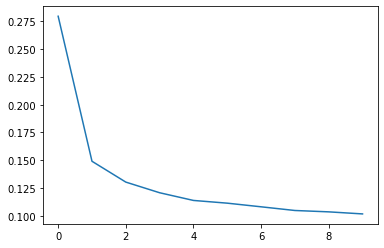

In [10]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();